<a href="https://colab.research.google.com/github/david116711/2021DL/blob/main/myTest_20211215_MNIST_Hand_Written_Digits_Classification_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://ai.plainenglish.io/vggnet-with-tensorflow-transfer-learning-with-vgg16-included-7e5f6fa9479a
# https://medium.com/jia-hong/%E5%9F%BA%E6%96%BC-vgg16-%E4%B9%8B%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98-9580ba85f224
# https://www.kaggle.com/anandad/classify-fashion-mnist-with-vgg16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/110_I/110_I_DeepLearning/HW3

/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3


In [ ]:
!wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz  #training set images (9912422 bytes)
!wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz  #training set labels (28881 bytes)
!wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz   #test set images (1648877 bytes)
!wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz   #test set labels (4542 bytes)

--2021-12-14 18:01:59--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train-images-idx3-ubyte.gz’ not modified on server. Omitting download.

--2021-12-14 18:01:59--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train-labels-idx1-ubyte.gz’ not modified on server. Omitting download.

--2021-12-14 18:01:59--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Conne

In [ ]:
import gzip
import os
import sys
import struct
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

In [ ]:
X_train=read_image(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/train-images-idx3-ubyte.gz', 'rb')),
y_train=read_label(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/train-labels-idx1-ubyte.gz', 'rb')),
X_test=read_image(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/t10k-images-idx3-ubyte.gz', 'rb')),
y_test=read_label(gzip.open('/content/drive/MyDrive/110_I/110_I_DeepLearning/HW3/t10k-labels-idx1-ubyte.gz', 'rb'))

In [ ]:
print(type(X_train), type(y_train))

<class 'tuple'> <class 'tuple'>


In [ ]:
len(X_train[0])

60000

In [ ]:
len(y_test)

10000

In [ ]:
X_training = X_train[0]
y_training = y_train[0]
X_testing = X_test[0]
y_testing = y_test

## 引用Keras

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

## 读取MNIST数据

In [ ]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#X_train = X_train.reshape(60000, 28,28,1)
#X_test = X_test.reshape(10000, 28,28,1)
#X_train = X_train.astype('float32')
#X_test  = X_test.astype('float32')
#X_train /= 255
#X_test  /= 255

In [ ]:
n_classes = 10

In [ ]:
#y_train = tensorflow.keras.utils.to_categorical(y_train, n_classes)
#y_test  = tensorflow.keras.utils.to_categorical(y_test, n_classes)

y_training = tensorflow.keras.utils.to_categorical(y_training, n_classes)
y_testing  = tensorflow.keras.utils.to_categorical(y_testing, n_classes)

In [ ]:
y_testing.shape

(10000, 10)

In [ ]:
y_training[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_training.shape

(60000, 10)

## 设定网路参数

In [ ]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

## 建立卷积神经网路

In [ ]:
model = tensorflow.keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 训练神经网路

In [ ]:
print(X_training.shape, X_testing.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
X_training = X_training.reshape(60000, 28,28,1)
X_testing = X_testing.reshape(10000, 28,28,1)

In [ ]:
print(X_testing.shape, y_testing.shape)

(10000, 28, 28, 1) (10000, 10)


In [ ]:
history = model.fit(X_training, y_training,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(X_testing, y_testing))

Epoch 1/15
600/600 [==============================] - 29s 47ms/step - loss: 0.2112 - accuracy: 0.9388 - val_loss: 0.0839 - val_accuracy: 0.9747
Epoch 2/15
600/600 [==============================] - 28s 47ms/step - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.0538 - val_accuracy: 0.9830
Epoch 3/15
600/600 [==============================] - 28s 46ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0464 - val_accuracy: 0.9834
Epoch 4/15
600/600 [==============================] - 28s 47ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0458 - val_accuracy: 0.9838
Epoch 5/15
600/600 [==============================] - 28s 46ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0409 - val_accuracy: 0.9865
Epoch 6/15
600/600 [==============================] - 28s 46ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0440 - val_accuracy: 0.9858
Epoch 7/15
600/600 [==============================] - 28s 46ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0421 - val_accuracy:

In [ ]:
import random 
import numpy as np 

noise = [0.1, 0.2, 0.3]
for k in noise:
  print(k)
  myNoiseXTesting = X_testing.copy()
  noise_lv = k            #0.1, 0.2, 0.3    
  img_size = 28*28 
  for i in range(len(myNoiseXTesting)): 
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size*noise_lv)) 
    x = myNoiseXTesting[i].reshape(-1, img_size) 
    x[0, ran_seq]=255

  loss, accuracy = model.evaluate(myNoiseXTesting, y_testing)
  print('noise: ', k, ' accuracy: ', accuracy)

0.1
313/313 [==============================] - 3s 9ms/step - loss: 6643.3154 - accuracy: 0.1074
noise:  0.1  accuracy:  0.10740000009536743
0.2
313/313 [==============================] - 3s 9ms/step - loss: 8110.4614 - accuracy: 0.1026
noise:  0.2  accuracy:  0.10260000079870224
0.3
313/313 [==============================] - 3s 9ms/step - loss: 8688.3652 - accuracy: 0.1010
noise:  0.3  accuracy:  0.10100000351667404


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16
tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# 預先訓練好的模型 -- VGG16, 不含後三層(辨識層)
model = VGG16(weights='imagenet', include_top=False)

# 任意一張圖片，例如大象
# img_path = './images/elephant.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
# img = image.load_img(img_path, target_size=(224, 224))
# 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# 特徵縮放，每個特徵減掉該特徵的平均數
# x = preprocess_input(x)

# features = model.predict(x)
# print(features)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, time
import matplotlib.pyplot as plt
#from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
#from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16;
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

In [ ]:
X_training = X_train[0]
y_training = y_train[0]
X_testing = X_test[0]
y_testing = y_test

In [ ]:
X_train = X_training.reshape(60000, 784)
X_test = X_testing.reshape(10000, 784)

In [ ]:
classes = np.unique(y_training)
num_classes = len(classes)
num_classes

10

In [ ]:
# Convert the images into 3 channels
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train.shape,X_test.shape

((60000, 784, 3), (10000, 784, 3))

In [ ]:
# Reshape images as per the tensor format required by tensorflow
X_train = X_train.reshape(-1,28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_train.shape,X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
y_training = tensorflow.keras.utils.to_categorical(y_training, n_classes)
y_testing  = tensorflow.keras.utils.to_categorical(y_testing, n_classes)

In [ ]:
# Splitting train data as train and validation data
X_train,X_valid,train_label,valid_label = train_test_split(X_train,
                              y_training,
                              test_size=0.2,
                              random_state=13
                              )

In [ ]:
# Define the parameters for instanitaing VGG16 model. 
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [ ]:
# Preprocessing the input 
X_train = preprocess_input(X_train)
#X_valid = preprocess_input(X_valid)
X_test = preprocess_input(X_test)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# 預先訓練好的模型 -- VGG16, 不含後三層(辨識層)
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
#  Create base model of VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
# Extracting features
train_features = conv_base.predict(np.array(X_train), batch_size=BATCH_SIZE, verbose=1)
#test_features = conv_base.predict(np.array(X_test), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(X_valid), batch_size=BATCH_SIZE, verbose=1)
#for layer in conv_base.layers:
#    layer.trainable = False

3750/3750 [==============================] - 1064s 284ms/step


NameError: ignored

In [ ]:
# 6.1 Saving the features so that they can be used for future
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, y_testing)
#np.savez("val_features", val_features, valid_label)

In [ ]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [ ]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
#val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [ ]:
train_features_flat.shape

(48000, 512)

In [ ]:
model2 = tensorflow.keras.Sequential()
model2.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model2.add(layers.Dense(n_hidden_1, activation = 'ReLU'))
model2.add(layers.Dense(10, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model2.fit(train_features_flat, y_training,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(test_features_flat, y_testing))

Epoch 1/15
480/480 [==============================] - 6s 12ms/step - loss: 2.3918 - accuracy: 0.1085 - val_loss: 2.3258 - val_accuracy: 0.1090
Epoch 2/15
480/480 [==============================] - 5s 10ms/step - loss: 2.3044 - accuracy: 0.1142 - val_loss: 2.3060 - val_accuracy: 0.1297
Epoch 3/15
480/480 [==============================] - 5s 10ms/step - loss: 2.2797 - accuracy: 0.1227 - val_loss: 2.2812 - val_accuracy: 0.1124
Epoch 4/15
480/480 [==============================] - 5s 10ms/step - loss: 2.2679 - accuracy: 0.1262 - val_loss: 2.2571 - val_accuracy: 0.1360
Epoch 5/15
480/480 [==============================] - 5s 10ms/step - loss: 2.2605 - accuracy: 0.1307 - val_loss: 2.2563 - val_accuracy: 0.1346
Epoch 6/15
480/480 [==============================] - 5s 10ms/step - loss: 2.2551 - accuracy: 0.1345 - val_loss: 2.2459 - val_accuracy: 0.1294
Epoch 7/15
480/480 [==============================] - 5s 10ms/step - loss: 2.2495 - accuracy: 0.1378 - val_loss: 2.2497 - val_accuracy: 0.1443

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
# 7.0 Define the densely connected classifier followed by leakyrelu layer and finally dense layer for the number of classes
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model.
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [ ]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [ ]:
train_features_flat.shape, train_label.shape

((48000, 512), (48000, 10))

In [ ]:
# Train the the model
history = model.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 2.4073 - acc: 0.1098 - val_loss: 2.3700 - val_acc: 0.1296 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3124 - acc: 0.1191 - val_loss: 2.2771 - val_acc: 0.1193 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.2767 - acc: 0.1230 - val_loss: 2.2716 - val_acc: 0.1330 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.2637 - acc: 0.1294 - val_loss: 2.2517 - val_acc: 0.1463 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.2579 - acc: 0.1334 - val_loss: 2.2498 - val_acc: 0.1461 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.2538 - acc: 0.1398 - val_loss: 2.2462 - val_acc: 0.1374 - lr: 0.0010
Epoch 7/100
1500/1500 [==============================] - 8s 6ms/step - loss: 2.2507 - acc: 0.1417 - val_loss: 2

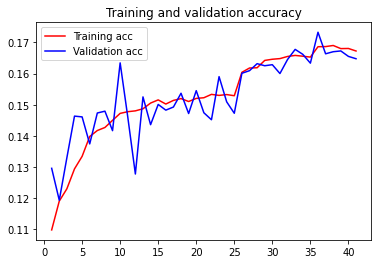

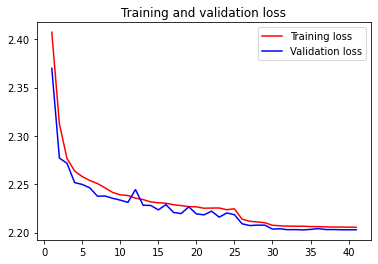

In [ ]:
# plot the loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
import random 
import numpy as np 

noise = [0.1, 0.2, 0.3]
for k in noise:
  print(k)
  myNoiseXTesting = test_features_flat.copy()
  noise_lv = k            #0.1, 0.2, 0.3    
  img_size = 28*28 
  for i in range(len(myNoiseXTesting)): 
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size*noise_lv)) 
    x = myNoiseXTesting[i].reshape(-1, img_size) 
    x[0, ran_seq]=255

  loss, accuracy = model.evaluate(myNoiseXTesting, y_testing)
  print('noise: ', k, ' accuracy: ', accuracy)

0.1


ValueError: ignored